Imported the necessary libraries that will be used in the program

In [10]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import gensim
from gensim import corpora
from gensim.models import LdaModel
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
from nltk.stem import WordNetLemmatizer

Preprocessing the text

In [ ]:
stop_words = set(stopwords.words('english'))
wnl = WordNetLemmatizer()

def preprocess_text(content):
    tokens = word_tokenize(content.lower())
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    lemmatized_tokens = [wnl.lemmatize(token) for token in filtered_tokens]
    return lemmatized_tokens

file_paths = [
    "C:/Users/asadj/PycharmProjects/pythonProject2/articles1.csv",
    "C:/Users/asadj/PycharmProjects/pythonProject2/articles2.csv",
    "C:/Users/asadj/PycharmProjects/pythonProject2/articles3.csv",
]


dfs = [pd.read_csv(file_path, usecols=['content']) for file_path in file_paths]
combined_df = pd.concat(dfs, ignore_index=True)
combined_df.dropna(subset=['content'], inplace=True)
combined_df['processed_content'] = combined_df['content'].apply(preprocess_text)
processed_docs = combined_df['processed_content'].tolist()

print(processed_docs[:2])

[['washington', 'congressional', 'republican', 'new', 'fear', 'come', 'health', 'care', 'lawsuit', 'obama', 'administration', 'might', 'win', 'incoming', 'trump', 'administration', 'could', 'choose', 'longer', 'defend', 'executive', 'branch', 'suit', 'challenge', 'administration', 'authority', 'spend', 'billion', 'dollar', 'health', 'insurance', 'subsidy', 'american', 'handing', 'house', 'republican', 'big', 'victory', 'issue', 'sudden', 'loss', 'disputed', 'subsidy', 'could', 'conceivably', 'cause', 'health', 'care', 'program', 'implode', 'leaving', 'million', 'people', 'without', 'access', 'health', 'insurance', 'republican', 'prepared', 'replacement', 'could', 'lead', 'chaos', 'insurance', 'market', 'spur', 'political', 'backlash', 'republican', 'gain', 'full', 'control', 'government', 'stave', 'outcome', 'republican', 'could', 'find', 'awkward', 'position', 'appropriating', 'huge', 'sum', 'temporarily', 'prop', 'obama', 'health', 'care', 'law', 'angering', 'conservative', 'voter', 

Creating a function to store topic-word distributions in a text file

In [ ]:
def save_topics_to_file(model, num_topics, file_name):
    with open(file_name, "a", encoding="utf-8") as file:  
        file.write(f"\n--- Topics with {num_topics} ---\n")
        for idx, topic in model.print_topics(num_words=10):
            file.write(f"Topic {idx + 1}: {topic}\n")

2 TOPICS

Generating topic-word distributions

In [ ]:

dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
num_topics_2 = 2
lda_model_2 = LdaModel(corpus, num_topics=num_topics_2, id2word=dictionary, passes=15, random_state=0)

output_file = "C:/Users/asadj/Downloads/topic_word.txt"
save_topics_to_file(lda_model_2, num_topics_2, output_file)

'\noutput_file = "C:/Users/asadj/Downloads/topic_word.txt"\nwith open(output_file, "w", encoding="utf-8") as file:\n    for idx, topic in lda_model.print_topics(num_words=10):\n        file.write(f"Topic {idx + 1}: {topic}\n")'

Generating document-topic distributions and storing them in a text file

In [46]:
output_file_doc = "C:/Users/asadj/Downloads/document_topic.txt"

with open(output_file_doc, "w", encoding="utf-8") as file:
    for i, doc in enumerate(corpus):
        file.write(f"\nDocument {i + 1} topic distribution:\n")
        doc_topics = lda_model_2.get_document_topics(doc)
        for topic_num, prob in doc_topics:
            file.write(f"Topic {topic_num + 1}: {prob:.4f}\n")

Perplexity score for model with 2 topics

In [32]:
perplexity_score = lda_model_2.log_perplexity(corpus)
print(f'Perplexity Score for {num_topics_2} topics: {perplexity_score}')

Perplexity Score for 2 topics: -8.63300734656698


Coherence score for model with 2 topics

In [33]:
from gensim.models.coherencemodel import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model_2, texts=processed_docs, dictionary=dictionary,
coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print(f'Coherence Score: {coherence_score}')

Coherence Score: 0.30660275808807913


Visualizing model with 2 topics

In [34]:
import pyLDAvis
import pyLDAvis.gensim

data = pyLDAvis.gensim.prepare(lda_model_2,corpus,dictionary)
pyLDAvis.display(data)

Topic Distributions with 2 topics

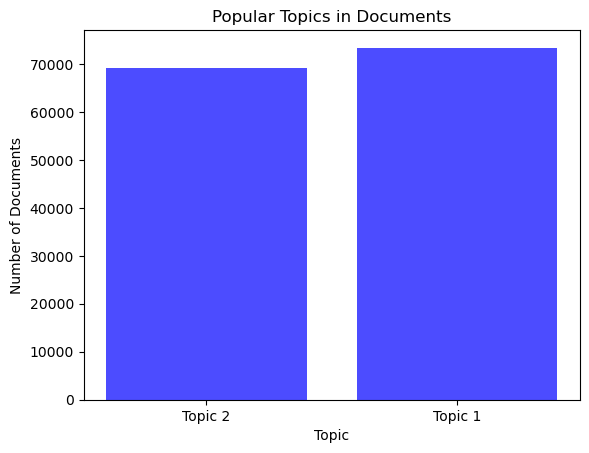

In [ ]:
topic_counts = Counter()
for doc in corpus:
    doc_topics = lda_model_2.get_document_topics(doc)
    dominant_topic = max(doc_topics, key=lambda x: x[1])[0]  
    topic_counts[dominant_topic] += 1

topics = list(topic_counts.keys())
frequencies = list(topic_counts.values())

plt.bar(topics, frequencies, color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Number of Documents')
plt.title('Popular Topics in Documents')
plt.xticks(range(len(topics)), [f'Topic {t+1}' for t in topics])
plt.show()


The chart shows that Topic 2 dominates the dataset, with a large number of documents assigned to it. Topic 1, on the other hand, has very few documents associated with it, indicating that it is much less significant or less relevant in this context.

5 TOPICS

Generating topic-word distributions for model with 5 topics

In [ ]:
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
num_topics_5 = 5
lda_model_5 = LdaModel(corpus, num_topics=num_topics_5, id2word=dictionary, passes=15, random_state=0)

with open(output_file, "a", encoding="utf-8") as file: 
    file.write(f"\n--- Topics with {num_topics_5} ---\n")
    for idx, topic in lda_model_5.print_topics(num_words=10):
        file.write(f"Topic {idx + 1}: {topic}\n")

'\n# Step 5: Display the topics\nfor idx, topic in lda_model.print_topics(num_words=10):\n    print(f"Topic {idx + 1}: {topic}")\n'

Generating document-topic distributions and appending to our output file.

In [47]:
with open(output_file_doc, "a", encoding="utf-8") as file: 
    for i, doc in enumerate(corpus):
        file.write(f"\nDocument {i + 1} topic distribution:\n")
        doc_topics = lda_model_5.get_document_topics(doc)
        for topic_num, prob in doc_topics:
            file.write(f"Topic {topic_num + 1}: {prob:.4f}\n")


Perplexity Score for 5 topics

In [40]:
#part a
perplexity_score = lda_model_5.log_perplexity(corpus)
print(f'Perplexity Score for {num_topics_5} topics: {perplexity_score}')

Perplexity Score for 5 topics: -8.53830298002264


Coherence scores for 5 topics

In [41]:
#partb
from gensim.models.coherencemodel import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model_5, texts=processed_docs, dictionary=dictionary,
coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print(f'Coherence Score: {coherence_score}')

Coherence Score: 0.42423833520791226


Visualizing model with 5 topics

In [42]:
import pyLDAvis
import pyLDAvis.gensim

data = pyLDAvis.gensim.prepare(lda_model_5,corpus,dictionary)
pyLDAvis.display(data)

Topic Distributions with 5 topics

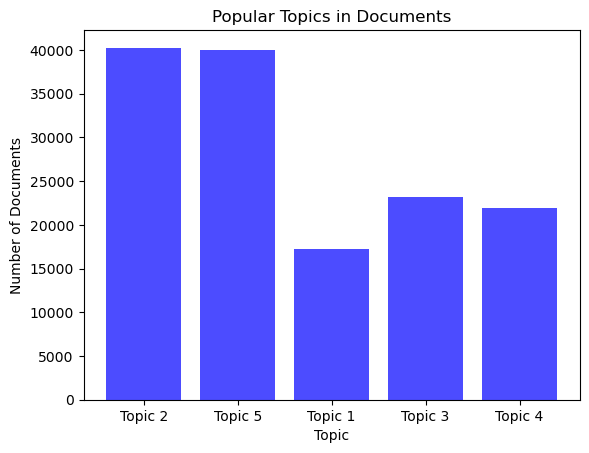

In [ ]:

topic_counts = Counter()
for doc in corpus:
    doc_topics = lda_model_5.get_document_topics(doc)
    dominant_topic = max(doc_topics, key=lambda x: x[1])[0]  
    topic_counts[dominant_topic] += 1

topics = list(topic_counts.keys())
frequencies = list(topic_counts.values())

plt.bar(topics, frequencies, color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Number of Documents')
plt.title('Popular Topics in Documents')
plt.xticks(range(len(topics)), [f'Topic {t+1}' for t in topics])
plt.show()

The chart shows that Topic 2 dominates the dataset by a small amount, with a large number of documents assigned to it. Topic 5 runs closely behind. Topic 1, on the other hand, has the least amount of documents associated with it, indicating that it is much less significant or less relevant in this context.

Perplexity Score for 5 topics

In [ ]:
#part a
perplexity_score = lda_model_5.log_perplexity(corpus)
print(f'Perplexity Score for {num_topics_5} topics: {perplexity_score}')

Coherence Score for 5 topics

In [ ]:
#partb
from gensim.models.coherencemodel import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model_5, texts=processed_docs, dictionary=dictionary,
coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print(f'Coherence Score: {coherence_score}')

7 TOPICS

Generating topic-word distributions for model with 7 topics

In [ ]:
dictionary = corpora.Dictionary(processed_docs)

# Step 3: Convert the documents to a document-term matrix
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Step 4: Train the LDA model
# Specify the number of topics
num_topics_7 = 7
lda_model_7 = LdaModel(corpus, num_topics=num_topics_7, id2word=dictionary, passes=15, random_state=0)
save_topics_to_file(lda_model_7, num_topics_7, output_file)

'# Step 5: Display the topics\nfor idx, topic in lda_model_7.print_topics(num_words=10):\n    print(f"Topic {idx + 1}: {topic}")'

Generating document-topic distributions for model with 7 topics and appending to the text file

In [52]:
with open(output_file_doc, "a", encoding="utf-8") as file: 
    for i, doc in enumerate(corpus):
        file.write(f"\nDocument {i + 1} topic distribution:\n")
        doc_topics = lda_model_7.get_document_topics(doc)
        for topic_num, prob in doc_topics:
            file.write(f"Topic {topic_num + 1}: {prob:.4f}\n")

Visualizing model with 7 topics

In [50]:
import pyLDAvis
import pyLDAvis.gensim

data = pyLDAvis.gensim.prepare(lda_model_7,corpus,dictionary)
pyLDAvis.display(data)

Visualizing topic distributions with 7 topics

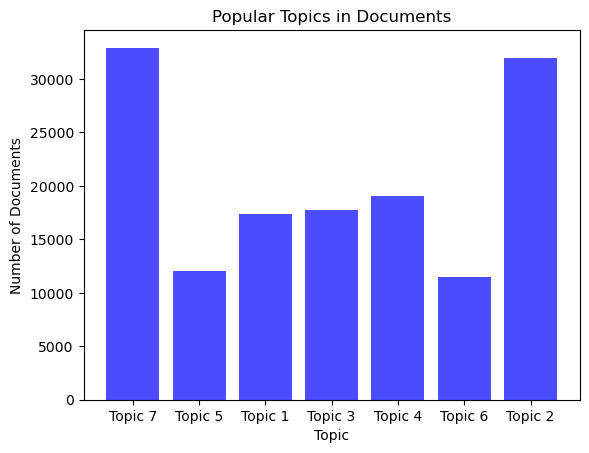

In [ ]:

topic_counts = Counter()
for doc in corpus:
    doc_topics = lda_model_7.get_document_topics(doc)
    dominant_topic = max(doc_topics, key=lambda x: x[1])[0]  
    topic_counts[dominant_topic] += 1


topics = list(topic_counts.keys())
frequencies = list(topic_counts.values())

plt.bar(topics, frequencies, color='blue', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Number of Documents')
plt.title('Popular Topics in Documents')
plt.xticks(range(len(topics)), [f'Topic {t+1}' for t in topics])
plt.show()


The chart shows that Topic 7 contains the most amount of documents followed by Topic 2 running closely behind. Topic 5 and 6 have the least amount of documents assigned to it.

Perplexity Score for 7 topics

In [54]:
#part a
perplexity_score = lda_model_7.log_perplexity(corpus)
print(f'Perplexity Score for {num_topics_7} topics: {perplexity_score}')

Perplexity Score for 7 topics: -8.581487921410147


Coherence Score for 7 topics

In [55]:
#partb
from gensim.models.coherencemodel import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model_7, texts=processed_docs, dictionary=dictionary,
coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print(f'Coherence Score: {coherence_score}')

Coherence Score: 0.4483523274935191


OPTIONAL PART

In [14]:
import random
sentences=random.sample(processed_docs,100)
print(sentences[:5])

[['cnn', 'actor', 'pulitzer', 'playwright', 'sam', 'shepard', 'arrested', 'monday', 'night', 'suspicion', 'drunken', 'driving', 'santa', 'fe', 'new', 'mexico', 'security', 'santa', 'fe', 'restaurant', 'called', 'police', 'spotting', 'man', 'trying', 'drive', 'away', 'blue', 'toyota', 'tacoma', 'police', 'said', 'leave', 'emergency', 'brake', 'still', 'people', 'concerned', 'man', 'intoxicated', 'police', 'andrea', 'dobyns', 'said', 'statement', 'officer', 'arrived', 'scene', 'found', 'male', 'later', 'identified', 'actor', 'sam', 'shepard', 'attempting', 'drive', 'away', 'toyota', 'truck', 'said', 'officer', 'spoke', 'shepard', 'smelled', 'alcohol', 'bloodshot', 'watery', 'shepard', 'told', 'officer', 'two', 'tequila', 'drink', 'restaurant', 'trying', 'drive', 'home', 'police', 'said', 'refused', 'breath', 'test', 'said', 'stepped', 'car', 'performed', 'field', 'sobriety', 'test', 'officer', 'observed', 'enough', 'clue', 'led', 'spending', 'monday', 'night', 'jail', 'arraigned', 'tuesd

In [21]:
from gensim.models.doc2vec import TaggedDocument
tagged_data=[TaggedDocument(words=sentence,tags=[str(i)]) for i, sentence in enumerate(sentences)]

In [22]:
from gensim.models import Doc2Vec
model=Doc2Vec(tagged_data,vector_size=100,window=5,min_count=1,epochs=100)

In [25]:
vector=model.infer_vector(sentences[0])
print(vector)

[ 1.1823176   2.1292515  -0.8969179  -0.13002802  1.4168272  -0.41543555
 -1.8681861  -1.4550443  -2.0893886   0.84002036  0.8724365  -4.5930085
  2.1941373  -1.2649065   1.524737   -0.5126793   2.2262163   1.9119003
 -2.4529207  -6.840706   -3.6098862  -1.360602   -0.42640865 -1.3170853
  4.3155074  -1.8566865  -3.6034722  -1.3657635  -2.2334535  -3.1025162
 -1.0448613   6.448042   -0.94523525  0.6031333   2.9394834   0.2854445
 -0.9396839  -3.9480948   0.84059256  0.7526076   1.5624617  -2.9347162
  0.45588282 -2.1769094   1.6642609   2.4115167  -0.4190293  -0.26686394
  4.0001173  -0.4642314  -1.0831194  -0.17757247 -1.4042445  -2.5782523
 -0.47266406  1.3571692  -1.290056   -2.6716657   1.0886041   0.44416097
  5.7291775   1.8042282  -1.9468013   1.7115505  -1.2675784   3.618873
  1.9716775   1.2063926  -3.3530614   0.624832   -9.818375    3.7257605
 -2.7731915  -1.7249725   0.85314417 -2.208801    3.8233075  -0.6715754
  1.9583652  -2.872381    2.3853104  -0.49517998  2.1697974   